<a href="https://colab.research.google.com/github/armelyara/hamoye_dsc_interns/blob/main/Hamoye_Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the packages and dataset
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/tmp/energydata_complete.csv')

#Remove columns from csv
df.drop(['date','lights'], inplace=True, axis=1)

In [ ]:
#Select a sample of dataset
energy_df = df[['T2', 'T6']].sample(15,random_state=2)

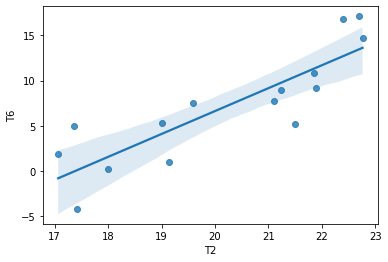

In [ ]:
#Visualizing a linear model with seaborn
sns.regplot(x='T2', y='T6', data=energy_df)

In [ ]:
#Normalize dataset with min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X = normalised_df.drop(columns=['Appliances'])
y = normalised_df['Appliances']

In [ ]:
#Split dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [ ]:
# Build Linear regresssion model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#Make predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

In [ ]:
#Residual Sum of squares RSS
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [ ]:
#Mean Squared Error MSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [ ]:
#R-squared or coefficient of determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [ ]:
#Build Ridge Model 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
#Build Lasso model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [ ]:
#New MSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088